# Анализ данных о температуре в крупных городах

Файл 'city_temperature.csv' содержит данные о среднесуточной температуре в 157 городах США и 167 крупных городах мира. исходные данные взяты из базы данных GSOD Национального климатического центра NCDC. 

Столбцы:
- Регион (Region)
- Страна (Country)
- Штат (State)
- Город (City)
- Месяц (Month)
- День (Day)
- Год (Year)
- Среднесуточная температура (AvgTemperature)

Отсутствующие данные в графе "Среднесуточная температура" обозначены флагом -99.
температура измерялась в Фаренгейтах. Разница в среднесуточной температуре между минимальным и максимальным значением дня составляет 1,48 F по данным Университета Дейтона. 

Данные взяты с сайта http://academic.udayton.edu/kissock/http/Weather/default.htm

In [1]:
# импорт модулей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Miron\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# загрузка данных
df = pd.read_csv('city_temperature.csv')
df.head()

C:\Users\Miron\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
# размер датафрейма
df.shape

(2906327, 8)

In [4]:
# типы данных по столбцам
df.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

Проверяем значения года, месяца и дня на наличие некорректных значений.

In [5]:
df.Year.unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020,  201,  200], dtype=int64)

In [6]:
df.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [7]:
df.Day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  0],
      dtype=int64)

В столбцах "Год" и "День" есть некорректные значения, удаляем их

In [8]:
df = df.drop((df.loc[df['Year'] == 200]).index | (df.loc[df['Year'] == 201]).index | (df.loc[df['Day'] == 0]).index)

In [10]:
# создание столбца "Date"
df['Date'] = df['Day'].astype(str)+ "-" + df['Month'].astype(str) + "-" + df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,1995-01-01
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,1995-02-01
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,1995-03-01
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,1995-04-01
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,1995-05-01


In [12]:
print('Дата начала сбора данных: {}'.format(df.Date.min()))
print('Дата окончания сбора данных: {}'.format(df.Date.max()))

Дата начала сбора данных: 1995-01-01 00:00:00
Дата окончания сбора данных: 2020-12-05 00:00:00


Удаляем строки с отсутствующими значениями среднесуточной температуры

In [13]:
df = df.drop(df[df['AvgTemperature']==-99.0].index)

Переводим значения среднесуточной температуры в градусы Цельсия


In [20]:
df['AvgTempC'] = round((df['AvgTemperature'] - 32) * (5 / 9), 1)

In [22]:
print('Минимальное значение температуры: {:.2f}'.format(df.AvgTempC.min()))
print('Максимальное значение температуры: {:.2f}'.format(df.AvgTempC.max()))
print('Среднее значение температуры: {:>10.2f}'.format(df.AvgTempC.mean()))

Минимальное значение температуры: -45.60
Максимальное значение температуры: 43.30
Среднее значение температуры:      15.76


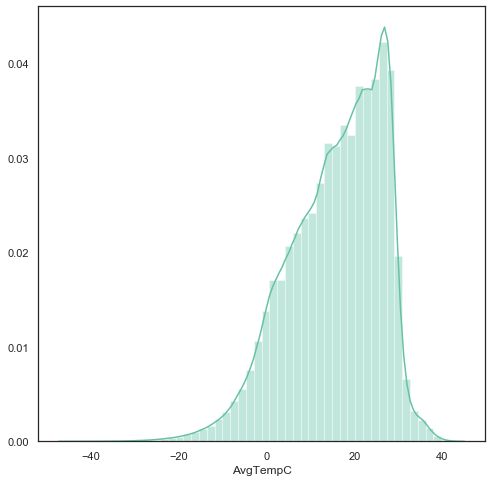

In [23]:
plt.rcParams['figure.figsize']=(8,8)
sns.set(style="white", palette="Set2", color_codes=True)
sns.distplot(df['AvgTempC'])

Проверяем значения регионов и стран

In [24]:
df.Region.unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

In [25]:
np.sort(df.Country.unique())

array(['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Brazil',
       'Bulgaria', 'Burundi', 'Canada', 'Central African Republic',
       'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic',
       'Egypt', 'Equador', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel',
       'Italy', 'Ivory Coast', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Macedonia',
       'Madagascar', 'Malawi', 'Malaysia', 'Mauritania', 'Mexico',
       'Mongolia', 'Morocco', 'Mozambique', 'Myanmar (Burma)', 'Namibia',
       'Nepal', 'New Zeal

Получем среднюю температуру по странам и строим график

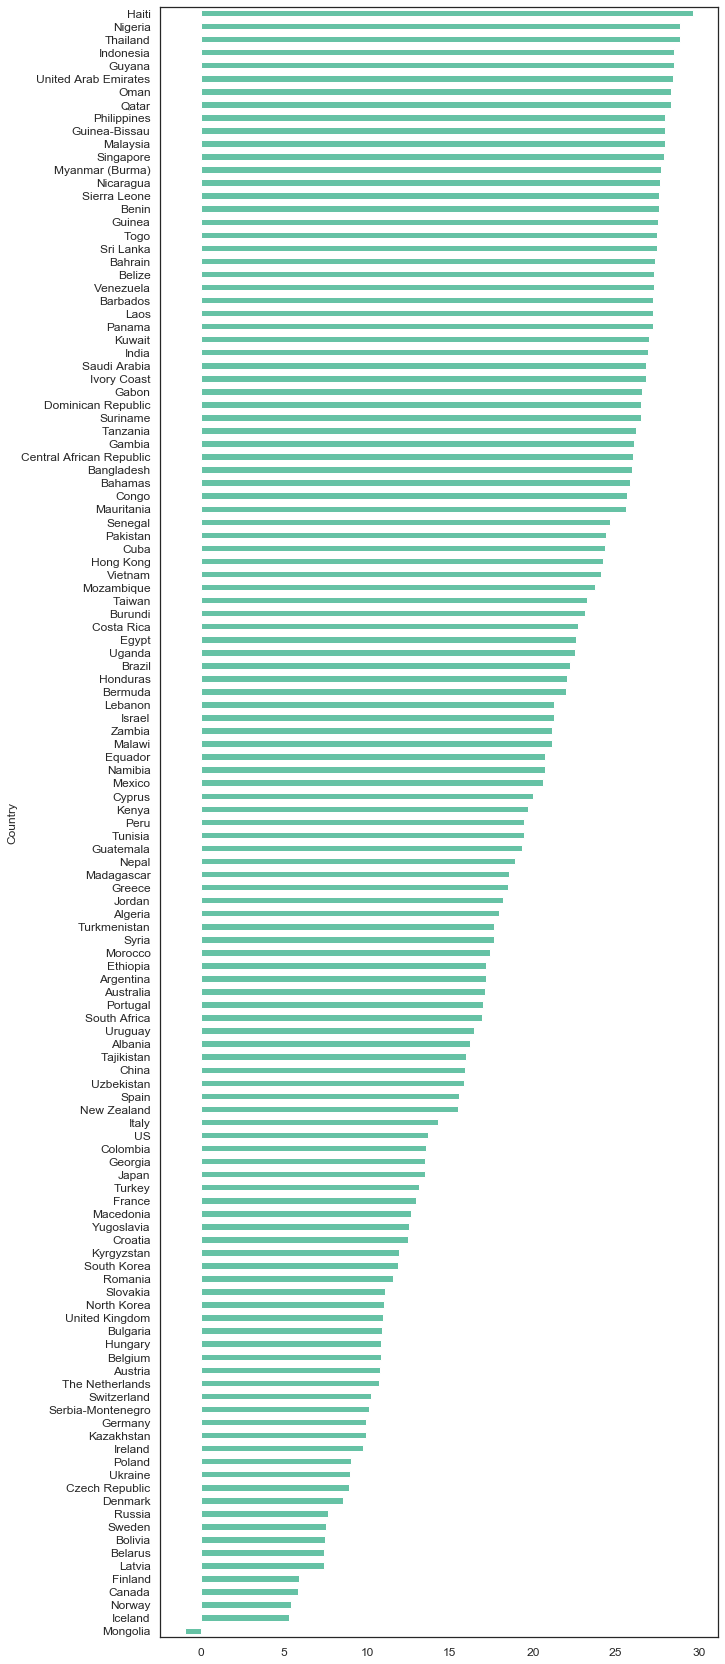

In [29]:
plt.rcParams['figure.figsize']=(10, 30)
plt.tick_params(axis='both', which='major', labelsize=12)
fig.suptitle('test title', fontsize=12)
df.groupby('Country')['AvgTempC'].mean().sort_values().plot(kind = 'barh')

In [32]:
# Посмотрим на самые жаркие страны в регионах
df.groupby(['Region','Country'])['AvgTempC'].max().sort_values(ascending=False).head(10)

Region         Country             
Middle East    Kuwait                  43.3
               Qatar                   42.5
North America  US                      42.1
Middle East    Saudi Arabia            42.1
               United Arab Emirates    41.9
               Oman                    41.1
Asia           India                   39.8
North America  Mexico                  39.7
Middle East    Bahrain                 39.6
Africa         Nigeria                 39.3
Name: AvgTempC, dtype: float64

In [33]:
# Посмотрим на самые холодные страны в регионах
df.groupby(['Region','Country'])['AvgTempC'].min().sort_values(ascending=True).head(10)

Region         Country   
North America  US           -45.6
Asia           Mongolia     -38.4
North America  Canada       -38.1
Europe         Russia       -29.1
Asia           China        -27.2
Europe         Belarus      -26.6
Asia           Kazakhstan   -25.7
Europe         Finland      -25.3
               Latvia       -24.5
               Ukraine      -23.9
Name: AvgTempC, dtype: float64

Создаем сводную таблицу, отображающую изменения среднесуточной температуры по регионам в зависимости от времени
Не учитываем данные за 2020 г., т.к. они представлены только за 5 месяцев

In [37]:
pivoted_df=pd.pivot_table(df[['Region','AvgTempC','Year']], 
                          values='AvgTempC', index=['Region'],
                          columns=['Year'], aggfunc=np.mean)

In [38]:
pivoted_df

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Region,,,,,,,,,,,,,,,,,,,,,
Africa,23.272222,23.085704,23.023177,23.193769,23.274374,23.010280,23.497950,23.494216,23.768822,23.688436,...,23.542110,23.129995,23.516668,23.720250,23.816292,24.046590,23.858176,23.711335,23.940439,23.997005
Asia,19.590668,19.927216,20.193676,20.590835,20.016433,19.843357,19.854392,20.032943,19.951357,20.174709,...,19.805959,19.576587,19.910309,19.892437,20.371119,20.475046,20.254431,20.253101,20.370723,16.593559
Australia/South Pacific,16.222339,16.088104,16.432009,16.684077,16.719643,16.588793,16.568484,16.762157,16.597097,16.587341,...,16.741050,16.521233,17.162003,17.138645,16.952106,17.214673,17.202650,17.120868,17.400974,20.064925
Europe,10.855507,10.077145,10.799948,11.037007,11.250538,11.678623,11.100984,11.395686,11.226157,10.994875,...,11.286615,10.800197,10.674757,11.536007,11.453119,11.116399,11.139400,11.583642,11.591214,7.337361
Middle East,22.007483,22.497858,21.711595,23.170730,23.170777,22.497204,23.419657,23.131578,23.152168,23.039217,...,23.141336,23.501401,23.508968,23.818888,24.148136,23.953696,23.901301,24.572719,23.851363,17.821861
North America,13.100885,12.290552,12.645939,14.166196,13.649737,13.066327,13.506521,13.313206,13.106135,13.209818,...,13.642135,14.498545,13.017757,12.899404,14.144801,14.606013,14.399556,13.894102,13.765237,8.609067
South/Central America & Carribean,21.468056,21.665892,22.315920,22.303788,21.756444,21.849093,22.212509,22.559984,22.311339,22.189762,...,22.307185,22.292549,22.496903,22.655613,23.274580,23.120951,23.009147,22.597849,22.887621,23.342618


Text(0.5, 1.0, 'График изменения среднесуточной температуры по регионам в 1995-2020 гг.')

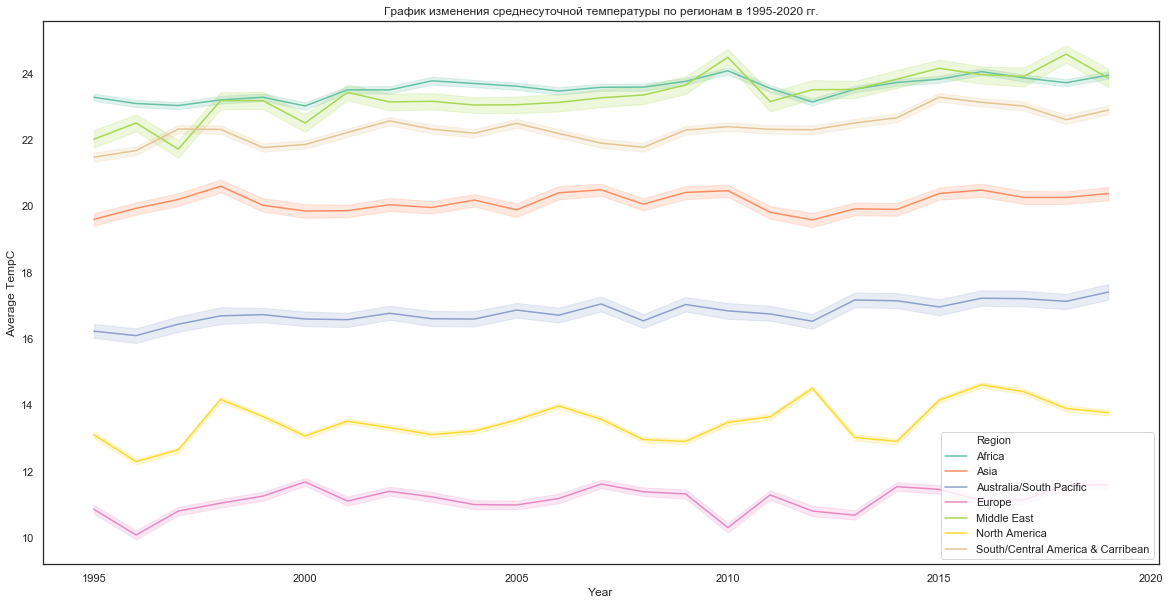

In [40]:
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams.update({'font.size': 22}) 
ax = sns.lineplot(x = 'Year', y = 'AvgTempC', hue = 'Region', data = df[(df.Year != 2020)])
ax.set(xlabel = 'Year', ylabel='Average TempC')
plt.title('График изменения среднесуточной температуры по регионам в 1995-2020 гг.')

На графике можно уведеть небольшую тенденцию к увеличению среднесуточной температуры. Наибольешая тенденция проявляется в регионе Middle East

Text(0.5, 1.0, 'График изменения среднесуточной температуры в 1995-2020 гг.')

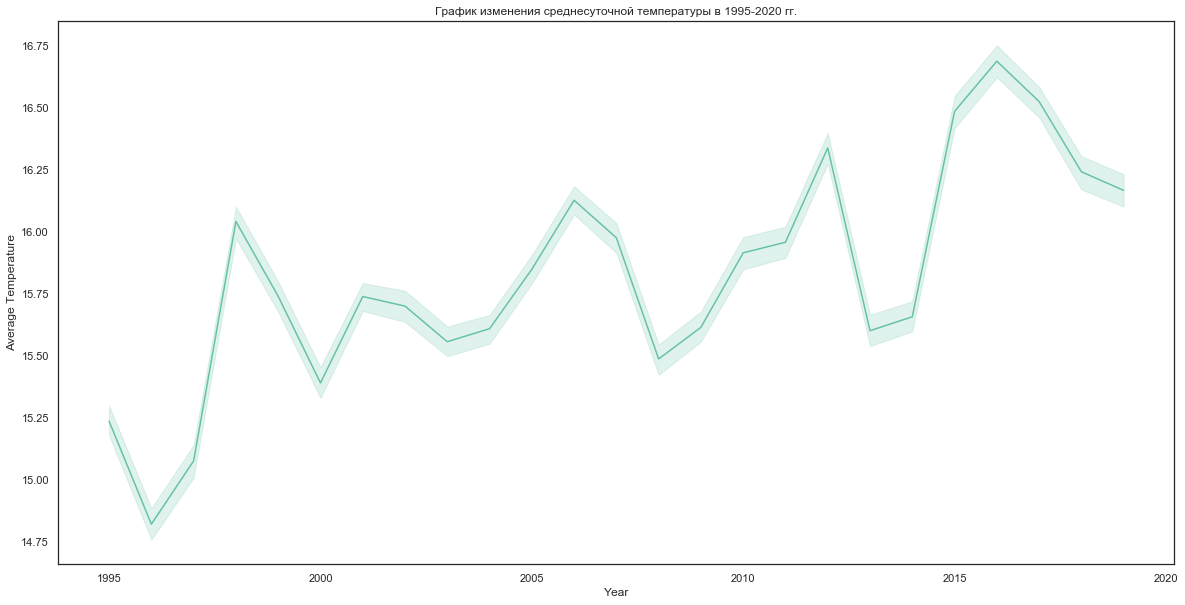

In [41]:
ax = sns.lineplot(x = 'Year', y = 'AvgTempC', data = df[(df.Year != 2020)])
ax.set(xlabel = 'Year', ylabel='Average Temperature')
plt.title('График изменения среднесуточной температуры в 1995-2020 гг.')

На графике можно увидеть тенденцию увеличения среднесуточной температуры в мире

Получим среднегодовую температуру в год и найдем разницу между показаниями 1995 и 2019 гг. Не берем показания 2020 г., потому что они неполные

In [48]:
df_year = df.groupby('Year').agg(avgtempyear = pd.NamedAgg(column='AvgTempC', aggfunc=np.average)).reset_index()
df_year

,Year,avgtempyear
0,1995,15.234145
1,1996,14.819338
2,1997,15.074248
3,1998,16.039146
4,1999,15.737645
5,2000,15.388488
6,2001,15.736810
7,2002,15.698086
8,2003,15.554530
9,2004,15.607081


In [62]:
temp_1995 = df_year[df_year['Year'] == 1995]['avgtempyear'].tolist()[0]
temp_2019 = df_year[df_year['Year'] == 2019]['avgtempyear'].tolist()[0]

print('Температура с 1995 г. увелиналась на {} градус Цельсия'.format(round(temp_2019 - temp_1995, 2)))

Температура с 1995 г. увелиналась на 0.93 градус Цельсия
